In [1]:
#download cat dof file
#https://doc-00-2o-docs.googleusercontent.com/docs/securesc/3s3g7448f8g334669frfotnoqns2pkov/9anj7bvnrjjb0ui7892esf8s6a9v82v0/1555840800000/10460567815026798714/14192496592089419195/1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm?e=download&nonce=2s8q3u3bebvoo&user=14192496592089419195&hash=gvuf3bkv30gite1k1nu0nu0spjludng8

In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
#images are of diff sizes
#shear range  is crop
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

Using TensorFlow backend.


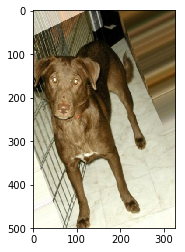

In [4]:
#ex check how random work
dog=cv2.imread('1.jpg')
dog=cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(image_gen.random_transform(dog)) #rt is auto do all up cell thing that nearby config

In [5]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [7]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(150,150,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(150,150,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(150,150,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1)) #cause need only 1 o/p
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [9]:
batch_Size=16
train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=(150,150,3)[:2],
                                               batch_size=batch_Size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [10]:
batch_Size=16
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=(150,150,3)[:2],
                                               batch_size=batch_Size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [11]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
result =model.fit_generator(train_image_gen,epochs=20,steps_per_epoch=150,
                           validation_data=test_image_gen,validation_steps=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
150/150 [==============================] - 278s 2s/step - loss: 0.7009 - acc: 0.4988 - val_loss: 0.6966 - val_acc: 0.4375
Epoch 2/20
150/150 [==============================] - 361s 2s/step - loss: 0.6913 - acc: 0.5242 - val_loss: 0.6938 - val_acc: 0.4479
Epoch 3/20
150/150 [==============================] - 324s 2s/step - loss: 0.6898 - acc: 0.5208 - val_loss: 0.6895 - val_acc: 0.5417
Epoch 4/20
150/150 [==============================] - 324s 2s/step - loss: 0.6889 - acc: 0.5371 - val_loss: 0.6956 - val_acc: 0.4531
Epoch 5/20
150/150 [==============================] - 329s 2s/step - loss: 0.6858 - acc: 0.5517 - val_loss: 0.6756 - val_acc: 0.5365
Epoch 6/20
150/150 [==============================] - 322s 2s/step - loss: 0.6720 - acc: 0.5863 - val_loss: 0.6832 - val_acc: 0.5469
Epoch 7/20
150/150 [==============================] - 319s 2s/step - loss: 0.6827 - acc: 0.5683 - val_loss: 0.6468 - val_acc: 0.6615
Epoch 8/20
150/150 [=

In [14]:
result.history['acc']

[0.49875,
 0.5241666666666667,
 0.5208333333333334,
 0.5370833333333334,
 0.5516666666666666,
 0.58625,
 0.5683333333333334,
 0.5872020076030171,
 0.62,
 0.6416666666666667,
 0.6279166666666667,
 0.6416666666666667,
 0.6508333333333334,
 0.6295833333333334,
 0.63875,
 0.6553743204428331,
 0.64125,
 0.6504166666666666,
 0.65625,
 0.68125]

In [15]:
#load pretrained model
#from keras.models import load_model

#new_model = load_model('cat_dog_100epochs.h5')

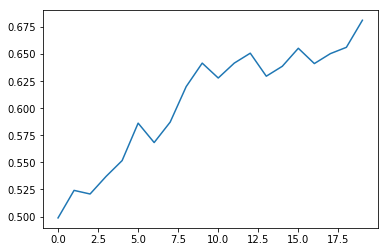

In [16]:
plt.plot(result.history['acc'])

In [37]:
dog_file = 'CATS_DOGS/test/CAT/10007.jpg'

In [38]:
from keras.preprocessing import image
dog_img=image.load_img(dog_file,target_size=(150,150))
dog_img = image.img_to_array(dog_img)
dog.shape

(500, 327, 3)

In [39]:
import numpy as np
dog_img = np.expand_dims(dog_img, axis=0)
dog_img.shape

(1, 150, 150, 3)

In [40]:
dog_img=dog_img/255
model.predict_classes(dog_img)

array([[0]])

In [41]:
model.predict(dog_img)

array([[0.1443053]], dtype=float32)